In [1]:
from __future__ import print_function
import os
%matplotlib inline

In [2]:
import glad_clusters.local_env as local_env
import glad_clusters.utils.service as us
import glad_clusters.utils.viewer as uv
import glad_clusters.utils.multiprocess as um
reload(um)
reload(us)
reload(uv)
from glad_clusters.utils.service import ClusterService
from glad_clusters.utils.viewer import ClusterViewer
from glad_clusters.utils.multiprocess import map_with_threadpool

---
#### ENV VARS

In [3]:
None==os.environ.get('csv_bucket')

True

In [4]:
local_env.export()


EXPORTING dev ENV:
	width: 5
	iterations: 25
	csv_bucket: gfw-clusters-test
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




In [5]:
os.environ.get('csv_bucket')

'gfw-clusters-test'

---
### ClusterService

In [6]:
WIDTHS=[5,8,10,12,15]
X,Y=1396,2090
START_YEAR=2017
NB_YEARS=1

In [7]:
START_DATE='{}-01-01'.format(START_YEAR)
END_DATE='{}-01-01'.format(START_YEAR+NB_YEARS)
START_DATE,END_DATE

('2017-01-01', '2018-01-01')

In [8]:
def service_and_view_for_width(w):
    service=ClusterService(x=X,y=Y,start_date=START_DATE,end_date=END_DATE,width=w)
    service.run()
    view=ClusterViewer(service)
    return w, service, view


def get_sv_dict(wsv_list):
    sv_dict={}
    for w,s,v in wsv_list:
        sv_dict[w]={ 'service': s, 'view': v }
    return sv_dict

In [9]:
%time wsv_list=map_with_threadpool(service_and_view_for_width,WIDTHS)

CPU times: user 332 ms, sys: 128 ms, total: 461 ms
Wall time: 9.51 s


In [10]:
SV_DICT=get_sv_dict(wsv_list)

In [11]:
def view_data(width):
    service=SV_DICT[width]['service']
    view=SV_DICT[width]['view']
    df=service.dataframe().head()
    nb_clusters=df.shape[0]
    print("----------------------------------")
    print("WIDTH:",width," NB CLUSTERS:",nb_clusters)
    print("----------------------------------")
    if nb_clusters:
        print(df[df.columns[:-1]])
        print("----------------------------------")
        print("INPUT DATA")
        print("----------------------------------")
        view.input(0)
        print("----------------------------------")
        print("CLUSTERS")
        print("----------------------------------")
        view.clusters(start=0,end=4,convex_hull=True)
    else:
        print("NO CLUSTERS FOUND")

In [12]:
print('WIDTHS:',SV_DICT.keys())

WIDTHS: [8, 10, 12, 5, 15]


----------------------------------
WIDTH: 5  NB CLUSTERS: 5
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0     29   132  20170716  20171028  -3.716371 -57.266429  1396  2090
1     34   346  20170614  20171105  -3.710524 -57.264361  1396  2090
2     40   100  20170302  20171020  -3.740791 -57.261604  1396  2090
3     35   258  20170801  20171105  -3.751453 -57.260225  1396  2090
4     51   266  20170716  20171028  -3.724970 -57.249540  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 13
TOTAL COUNT: 513
TOTAL AREA: 3771
DATES: 2017-03-02 to 2017-12-23


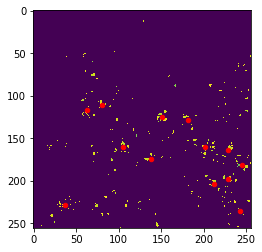

----------------------------------
CLUSTERS
----------------------------------


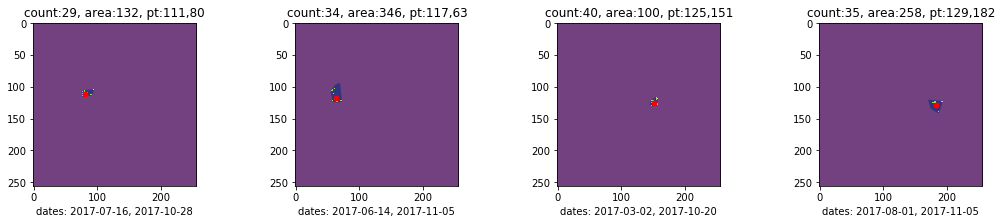

In [13]:
view_data(5)

----------------------------------
WIDTH: 8  NB CLUSTERS: 5
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0     28   462  20170521  20171223  -3.712244 -57.279527  1396  2090
1     48  2047  20170716  20171105  -3.770369 -57.267808  1396  2090
2     68  1010  20170614  20171105  -3.713620 -57.265395  1396  2090
3     89  1360  20170302  20171105  -3.744918 -57.259881  1396  2090
4     80  1094  20170419  20171028  -3.724970 -57.250919  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 10
TOTAL COUNT: 642
TOTAL AREA: 10543
DATES: 2017-03-02 to 2017-12-23


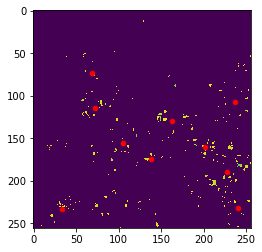

----------------------------------
CLUSTERS
----------------------------------


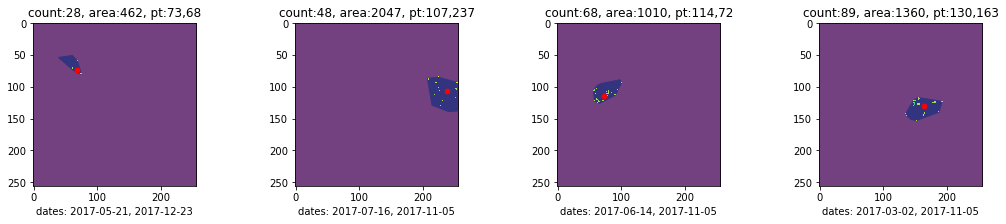

In [14]:
view_data(8)

----------------------------------
WIDTH: 10  NB CLUSTERS: 5
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0     29   924  20170521  20171223  -3.712244 -57.278837  1396  2090
1     46  1909  20170716  20171105  -3.770369 -57.267808  1396  2090
2     69  1269  20170614  20171105  -3.713964 -57.265395  1396  2090
3     88  1343  20170302  20171105  -3.745262 -57.259191  1396  2090
4    102  2211  20170419  20171028  -3.723594 -57.249885  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 9
TOTAL COUNT: 736
TOTAL AREA: 16758
DATES: 2017-03-02 to 2017-12-23


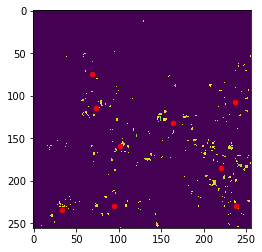

----------------------------------
CLUSTERS
----------------------------------


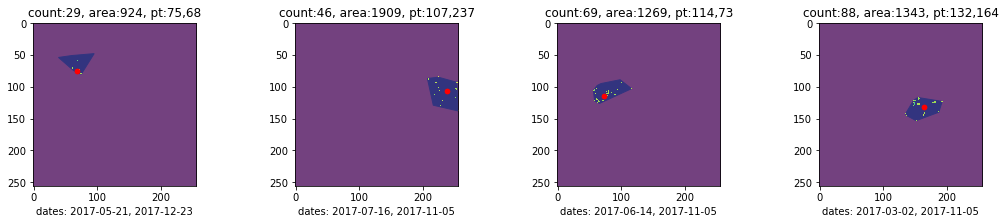

In [15]:
view_data(10)

----------------------------------
WIDTH: 12  NB CLUSTERS: 5
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0     57  3280  20170716  20171105  -3.770369 -57.269876  1396  2090
1    107  4429  20170521  20171223  -3.714307 -57.267463  1396  2090
2     95  2435  20170302  20171105  -3.745606 -57.258502  1396  2090
3    130  3702  20170419  20171028  -3.726345 -57.248162  1396  2090
4    305  7533  20170302  20171223  -3.764866 -57.239890  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 7
TOTAL COUNT: 792
TOTAL AREA: 23894
DATES: 2017-03-02 to 2017-12-23


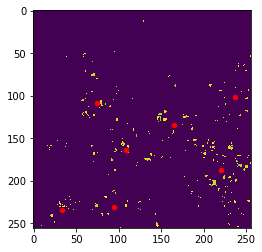

----------------------------------
CLUSTERS
----------------------------------


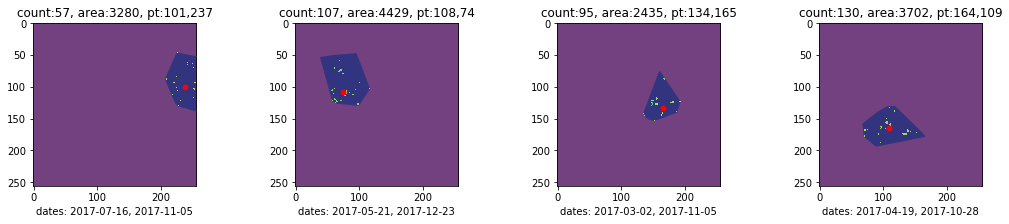

In [16]:
view_data(12)

----------------------------------
WIDTH: 15  NB CLUSTERS: 5
----------------------------------
   count  area  min_date  max_date  longitude   latitude     x     y
0     55  2835  20170716  20171105  -3.770369 -57.269876  1396  2090
1    106  4420  20170521  20171223  -3.714651 -57.267463  1396  2090
2    107  3320  20170302  20171105  -3.747326 -57.256434  1396  2090
3    131  3679  20170419  20171028  -3.727033 -57.248851  1396  2090
4    295  7606  20170302  20171223  -3.765210 -57.238856  1396  2090
----------------------------------
INPUT DATA
----------------------------------
NB CLUSTERS: 7
TOTAL COUNT: 809
TOTAL AREA: 25090
DATES: 2017-03-02 to 2017-12-23


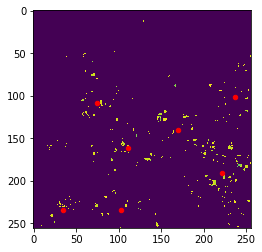

----------------------------------
CLUSTERS
----------------------------------


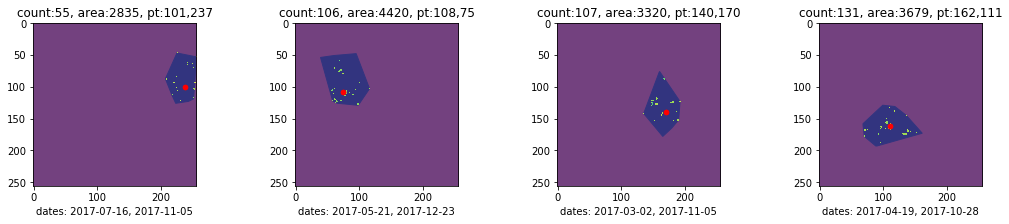

In [17]:
view_data(15)